<a href="https://colab.research.google.com/github/rrhew/OOI-Data/blob/master/OOIDataLabDataRequests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requesting, saving, and merging OOI data

## Requesting data
Here I'm going to use a library called [yodapy](https://github.com/cormorack/yodapy) that was developed by a group at the University of Washington to request data from OOI.  For a fully annotated example, see the [OOI ECS Interdisciplinary Data Access Notebook](https://github.com/ooi-interdisciplinary-brilliance/InterdisciplinaryEvaluation/blob/master/dataAccess.ipynb)

I'll start by installing the `yodapy` library and importing the packages I need.

In [0]:
!pip install yodapy
from yodapy.datasources import OOI
from yodapy.utils.creds import set_credentials_file
import matplotlib.pyplot as plt

To request data, you need to be registered with the OOI data portal. Below, you will have to set your credentials from the OOI data portal.  You can find these by logging into the data portal at https://ooinet.oceanobservatories.org/ and going to the 'My Profile' page, where your API username and token will be at the bottom.

In [0]:
set_credentials_file(data_source='ooi', username='OOIAPI-I0UCP16V67ENKZ', token='4CUPODF4AL256S')

Here is an example of requesting one data set.  We'll start by setting up the object and seeing what data is available.

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

,CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument
0,Coastal Pioneer
1,Offshore Surface Mooring
2,Surface Buoy
3,Bulk Meteorology Instrument Package
4,telemetered
5,metbk_a_dcl_instrument


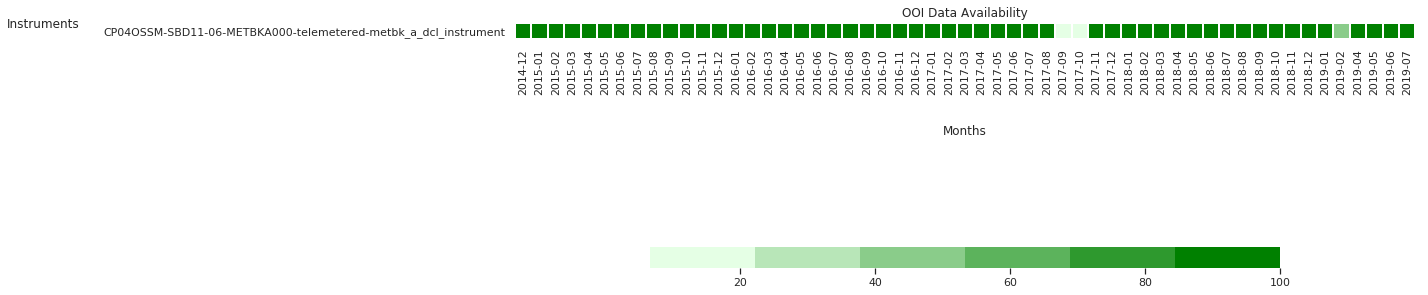

In [0]:
# First we initiate the ooi object
ooi = OOI() 

# We can directly search the entire ooi database using keys like node, instrument, region, stream, etc.  The following is setup to get the 
# meteorological package data from the pioneer offshore surface mooring, and the data I want is the data that was telemetered
OOISearch = ooi.search(instrument = 'metbk',region='pioneer',site='Offshore',stream  = 'metbk_a_dcl_instrument',stream_method = 'telemetered')

# Next, we can check what the availability of the data is.  This will print out a plot of the data timeline that is available.
OOISearch.data_availability()

Now that we know what's there, I'm going to send a request and then read the dataset into my notebook.

In [0]:
# The next step is to decide what period of data we want.  This can be done just by setting a start and end date, and then sending the request.
OOISearch.request_data(begin_date='2018-07-01', end_date='2019-01-01')

#These two lines will continue to check to see if the data is compiled on the server yet.
OOISearch.check_status()
# Once it is ready, we can automatically use xarray to read in our datasets.
OOISearch_list = OOISearch.to_xarray()
# Since we could request  more than one dataset at once using this method, you have to 
# specifically separate the datasets (think of this as a list where each element in the list is a dataset).  
# Since we only asked for one dataset here, we will take element [0] and assign it a name.
dsMet = OOISearch_list[0]

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


(MainThread) Data request time elapsed: 10s


Data request time elapsed: 10s


(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


(MainThread) Data request time elapsed: 20s


Data request time elapsed: 20s


(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


(MainThread) Data request time elapsed: 31s


Data request time elapsed: 31s


(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


(MainThread) Data request time elapsed: 42s


Data request time elapsed: 42s


(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


(MainThread) Data request time elapsed: 53s


Data request time elapsed: 53s


(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) is still compiling... Please wait.


(MainThread) Data request time elapsed: 63s


Data request time elapsed: 63s


(MainThread) Request (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) completed.


Request (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190726T214001551Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument) completed.


(MainThread) Acquiring data from opendap urls ...


## Look at what is insiide the dataframe/dataset

Now I can switch my dataset to a pandas dataframe, which resemebles a table rather than a netCDF file.**bold text**

In [0]:
# These datasets come in indexed by observation number, so we will first change it time.
dsMet = dsMet.swap_dims(({'obs':'time'}));
# Then, since I'm going to want to export as a csv file, I am going to change the dataset (netcdf file) to dataframe (csv format),  This can take a while.
dfMet = dsMet.to_dataframe()

We can plot the data either way, both from the dataset...

<xarray.Dataset>
Dimensions:                               (time: 269485)
Coordinates:
    obs                                   (time) int64 0 1 2 ... 172492 172493
  * time                                  (time) datetime64[ns] 2018-10-25T15:31:05.277000192 ... 2018-10-30T14:29:28.517000192
    lat                                   (time) float64 dask.array<shape=(269485,), chunksize=(96991,)>
    lon                                   (time) float64 dask.array<shape=(269485,), chunksize=(96991,)>
Data variables:
    deployment                            (time) int32 dask.array<shape=(269485,), chunksize=(96991,)>
    id                                    (time) |S64 dask.array<shape=(269485,), chunksize=(96991,)>
    air_temperature                       (time) float32 dask.array<shape=(269485,), chunksize=(96991,)>
    barometric_pressure                   (time) float32 dask.array<shape=(269485,), chunksize=(96991,)>
    dcl_controller_timestamp              (time) object dask.arra

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


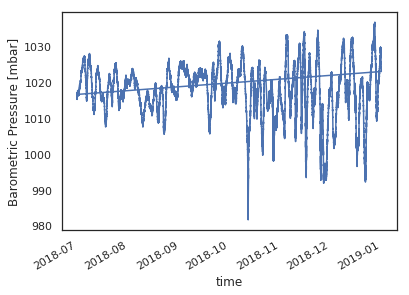

In [0]:
display(dsMet) # show what is inside the dataset
dsMet.barometric_pressure.plot() # plot the pressure from the dataset.  Our primary dimesion is time.

...or from the dataframe

,obs,deployment,id,air_temperature,barometric_pressure,dcl_controller_timestamp,driver_timestamp,eastward_wind_velocity,ingestion_timestamp,internal_timestamp,longwave_irradiance,northward_wind_velocity,port_timestamp,precipitation,preferred_timestamp,relative_humidity,sea_surface_conductivity,sea_surface_temperature,shortwave_irradiance,met_barpres,met_netsirr,met_spechum,eastward_velocity,northward_velocity,met_windavg_mag_corr_east,met_windavg_mag_corr_north,met_current_direction,met_current_speed,met_relwind_direction,met_relwind_speed,met_salsurf,met_heatflx_minute,met_latnflx_minute,met_netlirr_minute,met_sensflx_minute,ct_depth,barometric_pressure_qc_executed,barometric_pressure_qc_results,relative_humidity_qc_executed,relative_humidity_qc_results,air_temperature_qc_executed,air_temperature_qc_results,longwave_irradiance_qc_executed,longwave_irradiance_qc_results,precipitation_qc_executed,precipitation_qc_results,sea_surface_temperature_qc_executed,sea_surface_temperature_qc_results,sea_surface_conductivity_qc_executed,sea_surface_conductivity_qc_results,shortwave_irradiance_qc_executed,shortwave_irradiance_qc_results,eastward_wind_velocity_qc_executed,eastward_wind_velocity_qc_results,northward_wind_velocity_qc_executed,northward_wind_velocity_qc_results,met_barpres_qc_executed,met_barpres_qc_results,met_current_direction_qc_executed,met_current_direction_qc_results,met_current_speed_qc_executed,met_current_speed_qc_results,met_relwind_direction_qc_executed,met_relwind_direction_qc_results,met_relwind_speed_qc_executed,met_relwind_speed_qc_results,met_netsirr_qc_executed,met_netsirr_qc_results,met_salsurf_qc_executed,met_salsurf_qc_results,met_spechum_qc_executed,met_spechum_qc_results,lat,lon
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-25 15:31:05.277000192,0,9,b'8ea78d93-81b1-4a2e-8a77-dc07a71190a0',9.484,1017.010010,b'empty',2018-11-19 18:10:28.004439552,4.04,2018-11-19 18:11:56.187999744,1900-01-01,272.100006,-7.85,2018-10-25 15:31:05.277000192,9.25,b'port_timestamp',61.985001,4.0996,15.158,704.400024,101701.0,665.658020,4.526604,-0.048048,-0.253329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,13.0,29.0,29.0,29.0,13.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,12.0,29.0,12.0,29.0,12.0,29.0,12.0,29.0,28.0,29.0,12.0,29.0,29.0,39.93608,-70.88498
2018-10-25 15:32:08.371999744,1,9,b'5752e3fc-9764-45ed-ae27-203a97a38206',9.340,1017.010010,b'empty',2018-11-19 18:10:28.004516864,4.78,2018-11-19 18:11:56.187999744,1900-01-01,272.100006,-8.64,2018-10-25 15:32:08.371999744,9.25,b'port_timestamp',57.820000,4.0992,15.159,720.000000,101701.0,680.400024,4.180861,-0.047281,-0.254076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,13.0,29.0,29.0,29.0,13.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,12.0,29.0,12.0,29.0,12.0,29.0,12.0,29.0,28.0,29.0,12.0,29.0,29.0,39.93608,-70.88498
2018-10-25 15:32:41.592999936,2,9,b'4c7cc0de-4141-4a91-9b13-5f128910afde',9.370,1016.940002,b'empty',2018-11-19 18:10:28.004594688,2.51,2018-11-19 18:11:56.189000192,1900-01-01,272.100006,-9.98,2018-10-25 15:32:41.592999936,9.31,b'port_timestamp',59.786999,4.1002,15.168,726.299988,101694.0,686.353455,4.332524,-0.046878,-0.254469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,13.0,29.0,29.0,29.0,13.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,12.0,29.0,12.0,29.0,12.0,29.0,12.0,29.0,28.0,29.0,12.0,29.0,29.0,39.93608,-70.88498
2018-10-25 15:33:46.767000064,3,9,b'3a42994a-5673-4c59-87aa-31dc42a302e0',9.454,1017.289978,b'empty',2018-11-19 18:10:28.004674048,4.84,2018-11-19 18:11:56.189000192,1900-01-01,308.500000,-6.62,2018-10-25 15:33:46.767000064,9.25,b'port_timestamp',62.786999,4.0992,15.163,806.799988,101729.0,762.425964,4.574810,-0.046086,-0.255241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,13.0,29.0,29.0,29.0,13.0,29.0,29

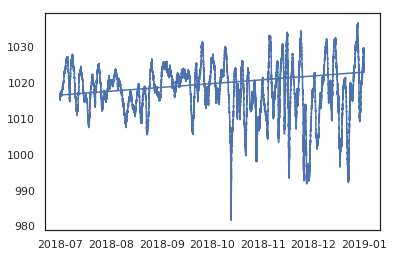

In [0]:
display(dfMet.head(5)) # look at the columns of the dataframe by printing the head
plt.plot(dfMet.index,dfMet.barometric_pressure) # use matplotlib to plot time (the index) vs pressure from the datatframe

## Save the dataframe to a .csv file

In [0]:
# And now I'll use pandas to save it to a csv file to our colab workspace
dfMet.to_csv('/MetData.csv')

## Lets download and save all the other datasets...

In [0]:
ooi = OOI()
OOISearch = ooi.search(instrument='flo',region='Coastal Pioneer',site='Central Offshore Profiler Mooring',node='Wire-Following Profiler',stream_method='recovered_wfp')
OOISearch.data_availability()
OOISearch.request_data(begin_date='2018-07-01', end_date='2019-01-01')
OOISearch.check_status()
OOISearch_list = OOISearch.to_xarray()
dsFlo = OOISearch_list[0]
dsFlo = dsFlo.swap_dims(({'obs':'time'}));
dfFlo = dsFlo.to_dataframe()
dfFlo.to_csv('/content/drive/My Drive/Research/OOI/OOI Data Labs/Flo.csv')

In [0]:
ooi = OOI()
OOISearch = ooi.search(instrument='ctd',region='Coastal Pioneer',site='Central Offshore Profiler Mooring',node='Wire-Following Profiler',stream_method='recovered_wfp')
OOISearch.data_availability()
OOISearch.request_data(begin_date='2018-07-01', end_date='2019-01-01')
OOISearch.check_status()
OOISearch_list = OOISearch.to_xarray()
dsCTD = OOISearch_list[0]
dsCTD = dsCTD.swap_dims(({'obs':'time'}));
dfCTD = dsCTD.to_dataframe()

In [0]:
ooi = OOI()
OOISearch = ooi.search(instrument='oxygen',region='Coastal Pioneer',site='Central Offshore Profiler Mooring',node='Wire-Following Profiler',stream_method='recovered_wfp')
OOISearch.data_availability()
OOISearch.request_data(begin_date='2018-07-01', end_date='2019-01-01')
OOISearch.check_status()
OOISearch_list = OOISearch.to_xarray()
dsOxy = OOISearch_list[0]
dsOxy = dsOxy.swap_dims(({'obs':'time'}));
dfOxy = dsOxy.to_dataframe()

In [0]:
ooi = OOI()
OOISearch = ooi.search(instrument='PAR',region='Coastal Pioneer',site='Central Offshore Profiler Mooring',node='Wire-Following Profiler',stream_method='recovered_wfp')
OOISearch.data_availability()
OOISearch.request_data(begin_date='2018-07-01', end_date='2019-01-01')
OOISearch.check_status()
OOISearch_list = OOISearch.to_xarray()
dsPar = OOISearch_list[0]
dsPar = dsPar.swap_dims(({'obs':'time'}));
dfPar = dsPar.to_dataframe()

In [0]:
dfCTD.to_csv('CTD.csv')
dfOxy.to_csv('Oxy.csv')
dfPar.to_csv('Par.csv')
dfMet.to_csv('Met.csv')
dfMet.to_csv('Flo.csv')

## Example of reading in and merging multiple dataframes

If we went ahead and saved all the data to csv files, we can read them back in if they're not already in our workspace.

In [0]:
from glob import glob
import pandas as pd

# Let's get a list of the csv files that we just saved
files = glob('*.csv')
files.sort() # sort them into alphabetical order
display(files) # print out the files

# We can ready in each of the files to their own dataframe.  We made them with pandas,
# saved them to csv, and now will read them abck in with pandas
df0 = pd.read_csv(files[0])
df1 = pd.read_csv(files[1])
df2 = pd.read_csv(files[2])
df3 = pd.read_csv(files[3])
df4 = pd.read_csv(files[4])

There a too many columns of stuff that we don't need in these dataframes, so let's clean it up and only keep the variables we want.

In [0]:

# There's only a few columns from each dataframe I actually want, so I'm going to select them specifically
df0 = df0[['time','ctdpf_ckl_seawater_temperature','ctdpf_ckl_seawater_pressure','practical_salinity','density']] # CTD
df1 = df1[['time','fluorometric_chlorophyll_a','fluorometric_cdom','optical_backscatter']] #Flo
df2 = df2[['time','barometric_pressure','air_temperature','eastward_wind_velocity','sea_surface_temperature','northward_wind_velocity','met_current_direction','met_relwind_direction','met_relwind_speed']] # MET
df3 = df3[['time','dofst_k_oxygen_l2']] # DO
df4 = df4[['time','parad_k_par']] #PAR


For each csv file we read in, pandas doesn't know that the time column is actually time. In a csv file, it just looks like text, so let's tell it to make it a datetime object and make it the index. Once we have a real datetime value for the index, we can resample based on the datetime.  Here it is to 1 minute intervals.

In [0]:
df0['time']= pd.to_datetime(df0.time) # set time to be itself, but as a datetime type rather than string
df0 = df0.set_index('time') # set the index to time
df0 = df0.resample('1T').mean() # resample to 1 minute intervals by taking the mean
df1['time']= pd.to_datetime(df1.time)
df1 = df1.set_index('time')
df1 = df1.resample('1T').mean()
df2['time']= pd.to_datetime(df2.time)
df2 = df2.set_index('time')
df2 = df2.resample('1T').mean()
df3['time']= pd.to_datetime(df3.time)
df3 = df3.set_index('time')
df3 = df3.resample('1T').mean()
df4['time']= pd.to_datetime(df4.time)
df4 = df4.set_index('time')
df4 = df4.resample('1T').mean()

The last thing to do is merge the new dataframes together.

In [0]:
# Now that everything has a time and is in the same 1-minute interval, we can merge
# the dataframes together into one big table, but we have to do it one at a time.
df_merged =df0.merge(df1,on='time') # first, merge df0 and df1
df_merged =df_merged.merge(df2,on='time') # then add on df2
df_merged =df_merged.merge(df3,on='time') # then add on df3
df_merged =df_merged.merge(df4,on='time') # then add on df4

Now, if we want, we can save the whole thing to one csv file and do the rest of our work from there.

In [0]:
df_merged.to_csv('hurricaneMerged.csv') # now we can save it as one csv file